In [1]:
# # Install necessary libraries
# !pip install kaggle  # Kaggle API to download datasets
# !pip install torch torchvision  # PyTorch libraries for deep learning
# !pip install streamlit  # For deployment demo (optional)
# !pip install gradio  # Alternative to Streamlit for deployment (optional)

In [2]:
# Authenticate Google Colab to access your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()  # This will open a file selector


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"senanik","key":"729e28caa6bba91f3dacfdac16313526"}'}

In [4]:
!mkdir -p ~/.kaggle  # Create a directory for Kaggle API token
!mv kaggle.json ~/.kaggle/  # Move the file to the appropriate folder
!chmod 600 ~/.kaggle/kaggle.json  # Restrict permissions for security


In [5]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12           8918        167  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                         94KB  2024-09-02 10:53:57          37369        654  1.0              
aravinii/house-price-prediction-treated-dataset              House Price Prediction Treated Dataset             295KB  2024-10-15 17:43:54           1124         23  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercis

In [6]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
100% 1.02G/1.03G [00:08<00:00, 186MB/s]
100% 1.03G/1.03G [00:08<00:00, 135MB/s]


In [7]:
# Unzip the dataset
!unzip asl-alphabet.zip -d ./asl_alphabet_data

Streaming output truncated to the last 5000 lines.
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: ./asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/nothing/

In [8]:
# Check the content to confirm everything is downloaded correctly
import os
print(os.listdir('./asl_alphabet_data'))

['asl_alphabet_train', 'asl_alphabet_test']


In [9]:
# Import required libraries for data exploration and visualization
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [10]:
# Define the path to the dataset
data_path = './asl_alphabet_data/asl_alphabet_train/asl_alphabet_train/'

In [11]:
# List all classes (folders) in the dataset
classes = os.listdir(data_path)
print(f"Number of Classes: {len(classes)}")
print(f"Classes: {classes}")

Number of Classes: 29
Classes: ['B', 'U', 'A', 'nothing', 'E', 'S', 'P', 'del', 'Y', 'O', 'Q', 'D', 'W', 'J', 'L', 'N', 'C', 'H', 'space', 'G', 'M', 'R', 'X', 'T', 'Z', 'F', 'I', 'V', 'K']


In [12]:
# Load and display the number of images per class
class_distribution = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in classes}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {'B': 3000, 'U': 3000, 'A': 3000, 'nothing': 3000, 'E': 3000, 'S': 3000, 'P': 3000, 'del': 3000, 'Y': 3000, 'O': 3000, 'Q': 3000, 'D': 3000, 'W': 3000, 'J': 3000, 'L': 3000, 'N': 3000, 'C': 3000, 'H': 3000, 'space': 3000, 'G': 3000, 'M': 3000, 'R': 3000, 'X': 3000, 'T': 3000, 'Z': 3000, 'F': 3000, 'I': 3000, 'V': 3000, 'K': 3000}


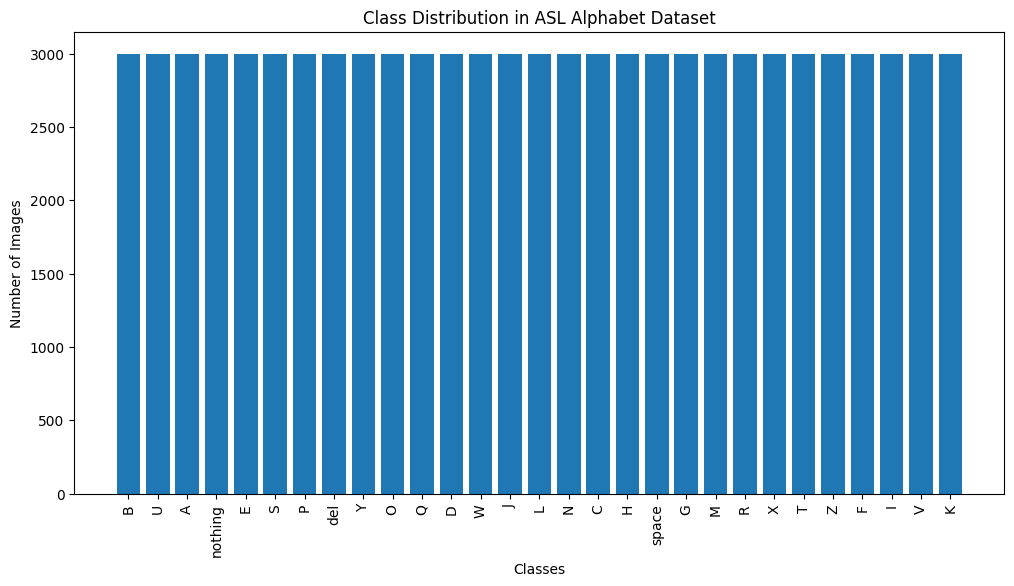

In [13]:
# Visualize the class distribution using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in ASL Alphabet Dataset')
plt.show()

In [14]:
# Function to display sample images from each class
def display_sample_images(data_path, classes, samples_per_class=1):
    plt.figure(figsize=(15, 15))

    for i, cls in enumerate(classes):
        # Load an image from each class
        img_path = os.path.join(data_path, cls, os.listdir(os.path.join(data_path, cls))[0])
        img = Image.open(img_path)

        # Plot the image
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

    plt.show()

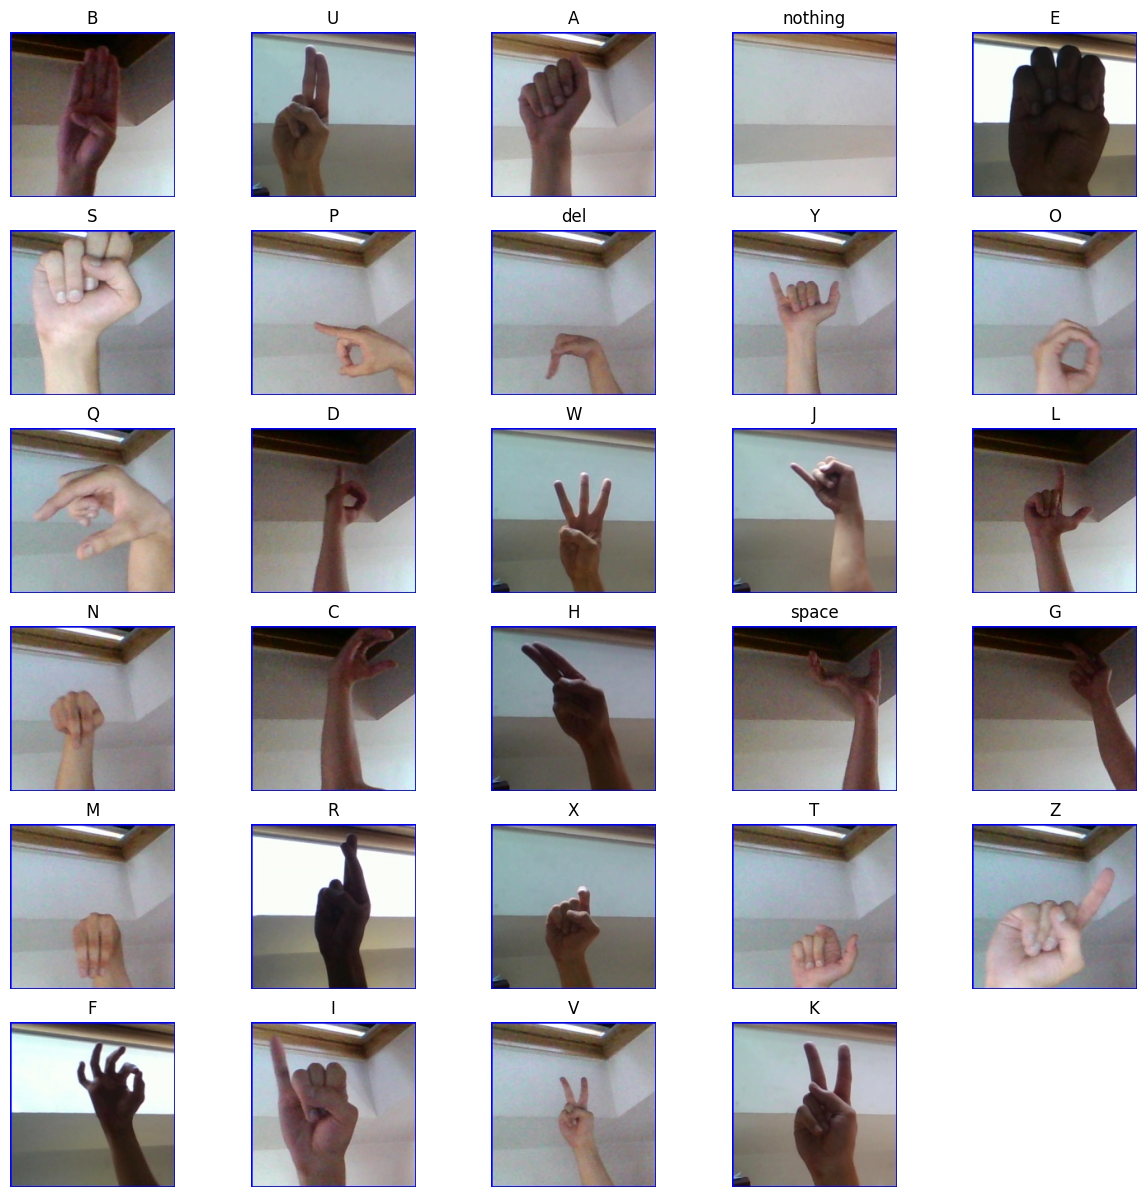

In [15]:
# Display one sample image from each class
display_sample_images(data_path, classes)

In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [22]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

# Define data transformations including data augmentation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Reload the dataset with transformations applied
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Split the dataset into train (80%), val (10%), and test (10%)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [23]:
import torch.nn as nn
import torchvision.models as models

# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer with a new one (26 output classes)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 26)

# Move the model to the appropriate device
model = model.to(device)

# Print the model structure
print(model)


Using device: cpu
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(

In [26]:
import torch.optim as optim
from tqdm import tqdm

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Label remapping function
def remap_labels(labels):
    # Ensure labels are in the range [0, 25]
    labels = torch.clamp(labels, min=0, max=25)
    return labels

# Initialize tracking variables for early stopping
best_val_loss = float('inf')
early_stop_patience = 5
epochs_no_improve = 0

# Track losses and accuracies
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 7
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')

    # Training phase
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader):
        labels = remap_labels(labels).to(device).long()  # Remap labels and send to device
        images = images.to(device).float()

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_losses.append(train_loss / total)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels = remap_labels(labels).to(device).long()
            images = images.to(device).float()

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    val_losses.append(val_loss / total)
    val_accuracies.append(val_accuracy)

    print(f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}')

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print("Early stopping triggered!")
            break

# Load the best model
model.load_state_dict(best_model_state)


Epoch 1/7


100%|██████████| 2175/2175 [32:25<00:00,  1.12it/s]


Train Loss: 1.5623, Train Accuracy: 0.5365
Val Loss: 1.4495, Val Accuracy: 0.5759
Epoch 2/7


100%|██████████| 2175/2175 [31:27<00:00,  1.15it/s]


Train Loss: 1.4969, Train Accuracy: 0.5543
Val Loss: 1.3870, Val Accuracy: 0.5822
Epoch 3/7


100%|██████████| 2175/2175 [32:01<00:00,  1.13it/s]


Train Loss: 1.4657, Train Accuracy: 0.5614
Val Loss: 1.3335, Val Accuracy: 0.6047
Epoch 4/7


100%|██████████| 2175/2175 [31:16<00:00,  1.16it/s]


Train Loss: 1.4256, Train Accuracy: 0.5748
Val Loss: 1.3309, Val Accuracy: 0.6026
Epoch 5/7


100%|██████████| 2175/2175 [31:19<00:00,  1.16it/s]


Train Loss: 1.4072, Train Accuracy: 0.5789
Val Loss: 1.3506, Val Accuracy: 0.6047
Epoch 6/7


100%|██████████| 2175/2175 [31:32<00:00,  1.15it/s]


Train Loss: 1.3994, Train Accuracy: 0.5838
Val Loss: 1.2765, Val Accuracy: 0.6131
Epoch 7/7


100%|██████████| 2175/2175 [31:33<00:00,  1.15it/s]


Train Loss: 1.3762, Train Accuracy: 0.5899
Val Loss: 1.2249, Val Accuracy: 0.6328


<All keys matched successfully>

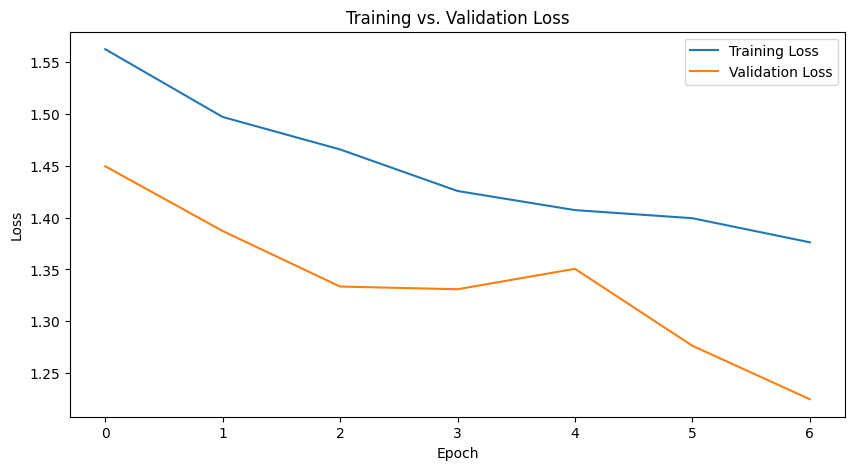

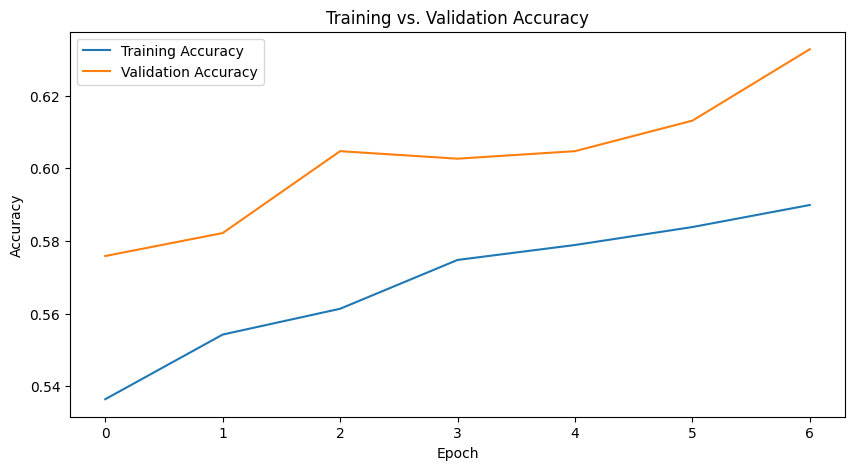

In [27]:
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()


In [30]:
import torch
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the model is in evaluation mode
model.eval()

# Initialize variables for tracking test performance
test_loss, correct, total = 0.0, 0, 0
all_labels = []
all_preds = []

# Evaluate the model on the test set
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.to(device).long()
        images = images.to(device).float()

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collect all predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Track accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate overall accuracy
test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)

# Print precision, recall, and F1-score for each class
print("\nPrecision, Recall, and F1-Score per Class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1[i]:.4f}")

# Generate a weighted average F1-Score (to handle class imbalance)
weighted_f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"\nWeighted F1-Score: {weighted_f1:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy: 0.5601

Precision, Recall, and F1-Score per Class:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NameError: name 'class_names' is not defined

Test Accuracy: 0.5483

Precision, Recall, and F1-Score per Class:
A: Precision=0.6691, Recall=0.6392, F1-Score=0.6538
B: Precision=0.7302, Recall=0.6133, F1-Score=0.6667
C: Precision=0.7633, Recall=0.8296, F1-Score=0.7951
D: Precision=0.7973, Recall=0.7891, F1-Score=0.7932
E: Precision=0.6589, Recall=0.6589, F1-Score=0.6589
F: Precision=0.7493, Recall=0.8355, F1-Score=0.7900
G: Precision=0.5542, Recall=0.7458, F1-Score=0.6358
H: Precision=0.7900, Recall=0.7400, F1-Score=0.7642
I: Precision=0.6276, Recall=0.5928, F1-Score=0.6097
J: Precision=0.6821, Recall=0.6398, F1-Score=0.6603
K: Precision=0.5963, Recall=0.6758, F1-Score=0.6335
L: Precision=0.6420, Recall=0.6820, F1-Score=0.6614
M: Precision=0.8201, Recall=0.4057, F1-Score=0.5429
N: Precision=0.5942, Recall=0.6020, F1-Score=0.5980
O: Precision=0.9123, Recall=0.6624, F1-Score=0.7675
P: Precision=0.7116, Recall=0.7801, F1-Score=0.7443
Q: Precision=0.6520, Recall=0.7534, F1-Score=0.6991
R: Precision=0.5437, Recall=0.4405, F1-Score=0.486

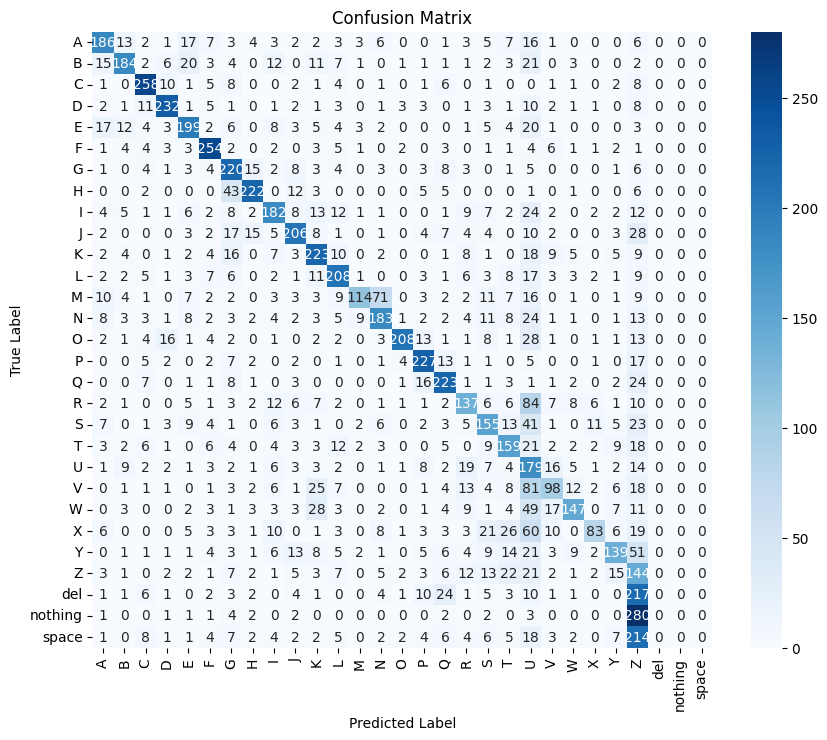

In [32]:
import torch
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the model is in evaluation mode
model.eval()

# Initialize variables for tracking test performance
test_loss, correct, total = 0.0, 0, 0
all_labels = []
all_preds = []

# Evaluate the model on the test set
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.to(device).long()
        images = images.to(device).float()

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collect all predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Track accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate overall accuracy
test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

# Retrieve class names if not defined already
class_names = train_dataset.dataset.classes  # Ensure this points to your dataset object

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Calculate precision, recall, and F1-score for each class with zero_division handling
precision, recall, f1, _ = precision_recall_fscore_support(
    all_labels, all_preds, average=None, zero_division=0
)

# Print precision, recall, and F1-score for each class
print("\nPrecision, Recall, and F1-Score per Class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1[i]:.4f}")

# Generate a weighted average F1-Score to handle class imbalance
weighted_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
print(f"\nWeighted F1-Score: {weighted_f1:.4f}")

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names, zero_division=0))

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


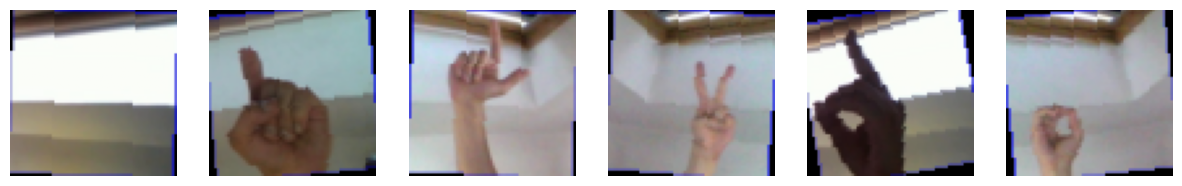

In [34]:
# Display some sample images from the training set
def show_batch(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)  # Use next() function correctly here
    fig, axes = plt.subplots(1, 6, figsize=(15, 6))
    for i in range(6):
        ax = axes[i]
        img = images[i].permute(1, 2, 0).numpy()  # Rearrange dimensions
        img = img * 0.5 + 0.5  # Unnormalize the image
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Show a batch of training images
show_batch(train_loader)


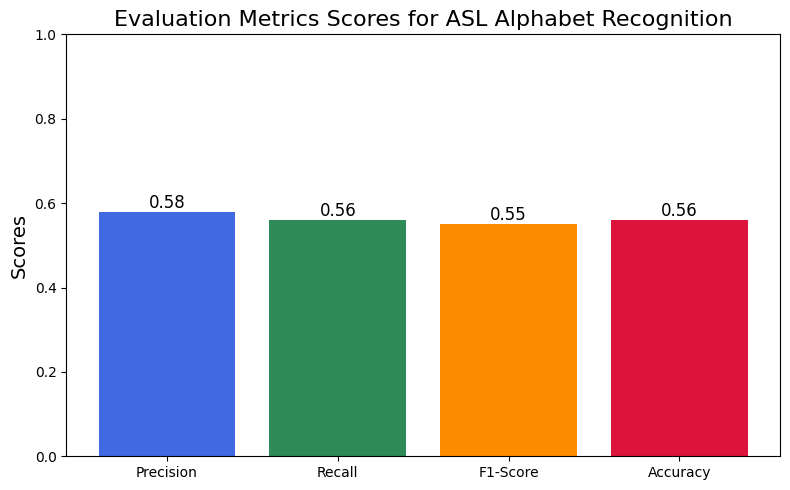

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Use the 'all_labels' and 'all_preds' from your evaluation code
precision, recall, f1, _ = precision_recall_fscore_support(
    all_labels, all_preds, average=None, zero_division=0
)

# Calculate Average Precision, Recall, F1-Score
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1 = np.mean(f1)

# Calculate Overall Accuracy
conf_matrix = confusion_matrix(all_labels, all_preds)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
avg_accuracy = np.mean(class_accuracy)

# Store metrics in lists for plotting
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
scores = [avg_precision, avg_recall, avg_f1, avg_accuracy]

# Plot the average scores as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['royalblue', 'seagreen', 'darkorange', 'crimson'])

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

# Set chart title and labels
plt.title('Evaluation Metrics Scores for ASL Alphabet Recognition', fontsize=16)
plt.ylabel('Scores', fontsize=14)
plt.ylim([0, 1])  # Set y-axis limit to [0, 1] since metrics are proportions

# Display the plot
plt.tight_layout()
plt.show()


In [40]:
from google.colab import files
from PIL import Image

# Upload a sample image from your local system
uploaded = files.upload()  # This will prompt you to upload a file

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = Image.open(image_path).convert('RGB')

print(f"Loaded image: {image_path}")


Saving P_test.jpg to P_test.jpg
Loaded image: P_test.jpg


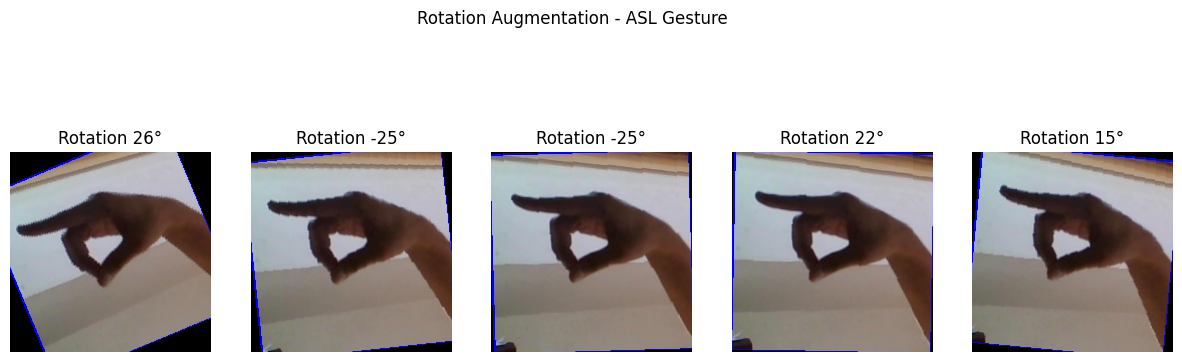

In [41]:
import matplotlib.pyplot as plt
from torchvision import transforms
import random

# Define the rotation transform with a random degree
rotation_transform = transforms.RandomRotation(degrees=30)  # Rotate between -30 to +30 degrees

# Apply rotation augmentation multiple times and display the results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('Rotation Augmentation - ASL Gesture')

for i in range(5):
    # Apply random rotation and convert back to PIL for visualization
    rotated_image = rotation_transform(original_image)

    # Display the rotated image
    axes[i].imshow(rotated_image)
    axes[i].set_title(f'Rotation {random.randint(-30, 30)}°')
    axes[i].axis('off')

plt.show()


In [52]:
from google.colab import files
from PIL import Image

# Upload a sample image from your local system
uploaded = files.upload()  # This will prompt you to upload a file

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = Image.open(image_path).convert('RGB')

print(f"Loaded image: {image_path}")


Saving P_test.jpg to P_test (1).jpg
Loaded image: P_test (1).jpg


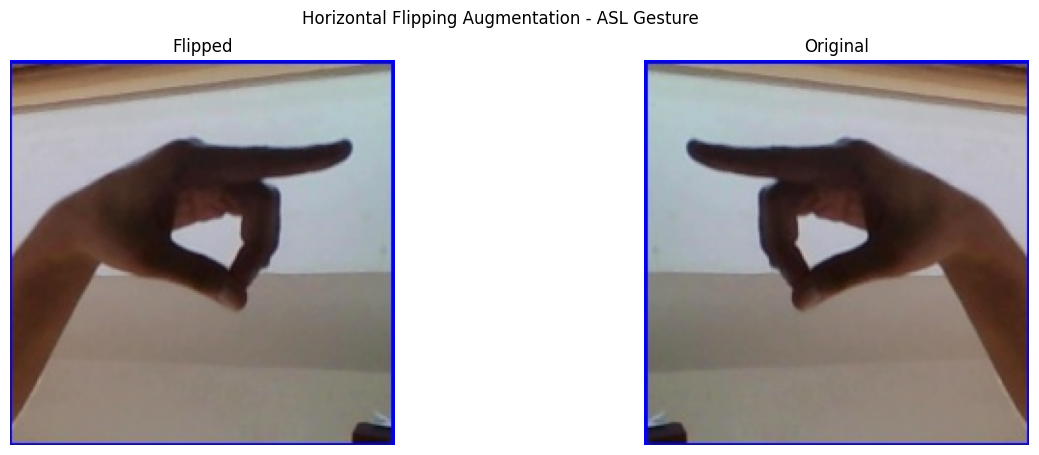

In [53]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Define the horizontal flip transform (manually applied)
flip_transform = transforms.functional.hflip  # Function to apply horizontal flip

# Display the original and flipped image side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Horizontal Flipping Augmentation - ASL Gesture')

for i in range(2):
    if i % 2 == 0:
        # Flip the image for even indices
        flipped_image = flip_transform(original_image)
        axes[i].imshow(flipped_image)
        axes[i].set_title('Flipped')
    else:
        # Show the original image for odd indices
        axes[i].imshow(original_image)
        axes[i].set_title('Original')

    axes[i].axis('off')

plt.show()
